# This is Regressoin Project
### In this project we build a laptop price predictor web application that predict Price of laptop on the basis of details we provide

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv("/content/laptop_data.csv")

In [112]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [114]:
df.duplicated().sum()

0

In [115]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [116]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [117]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [118]:
df['Ram'] = df['Ram'].str.replace('GB' , '').astype('int32')
df['Weight']=df['Weight'].str.replace('kg' , '').astype('float32')

In [119]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### EDA part
- both Univariate and Bivariate

<ipython-input-121-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

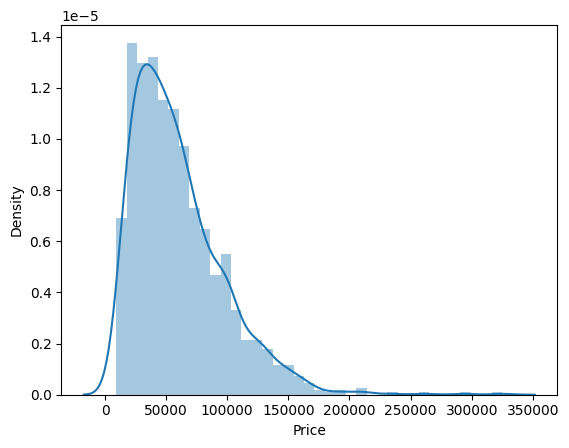

In [121]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

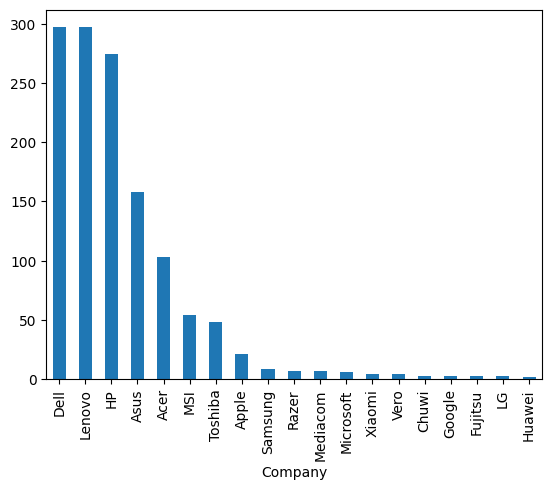

In [122]:
df['Company'].value_counts().plot(kind='bar')

- average price of each company laptop

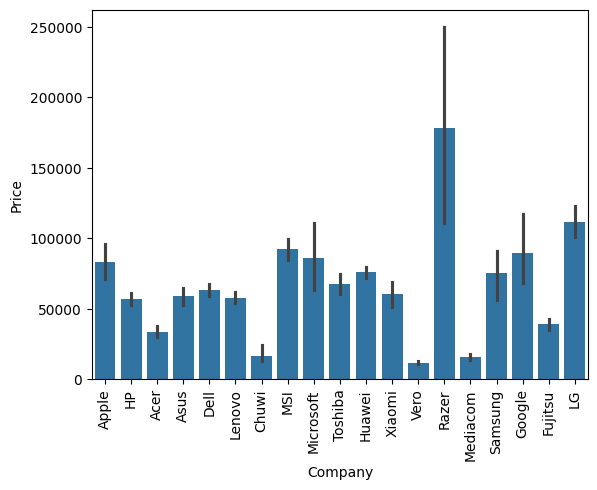

In [123]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

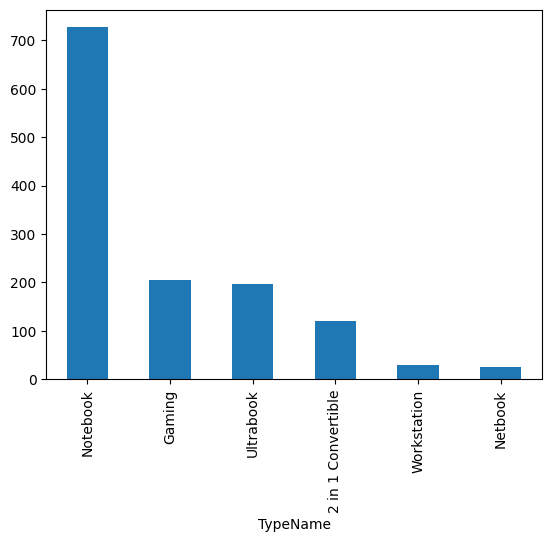

In [124]:
df['TypeName'].value_counts().plot(kind='bar')

- give average price according to laptop type

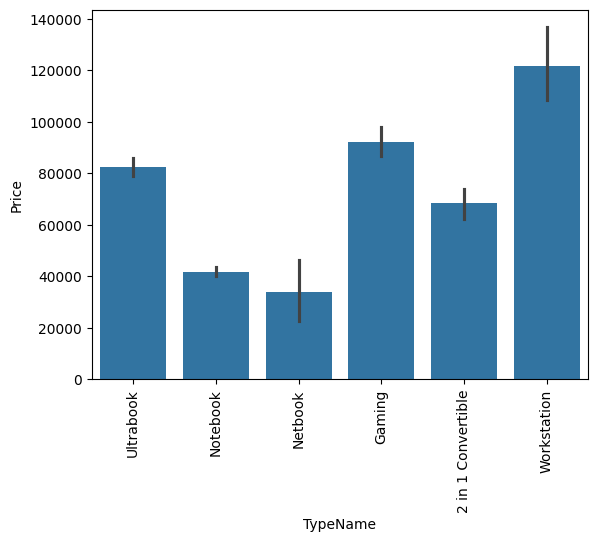

In [125]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-126-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

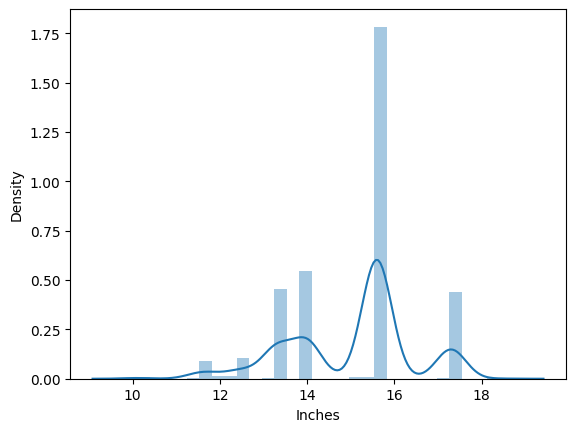

In [126]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

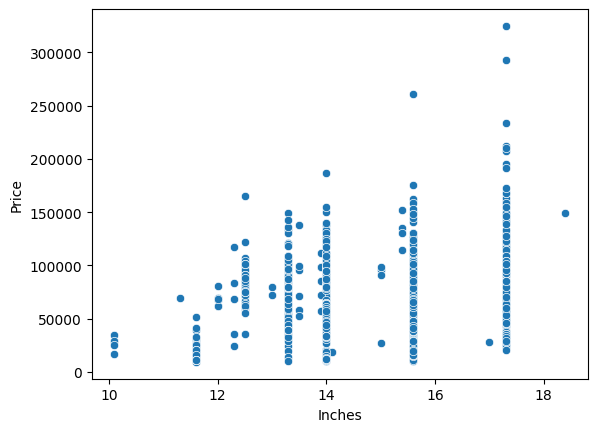

In [127]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [128]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


- using feature engineering we will extract info wether a laptop is touch-scree  or not from column = 'ScreenResolution	'

In [129]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [130]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

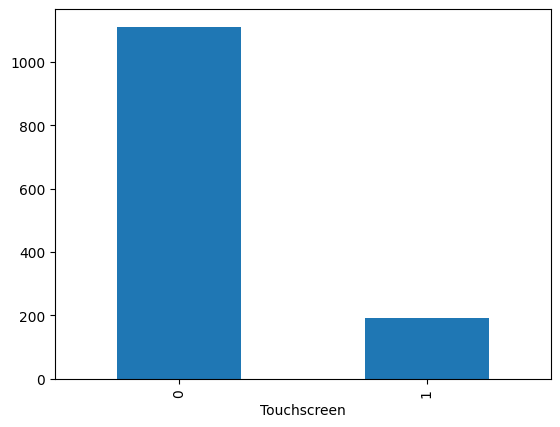

In [131]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

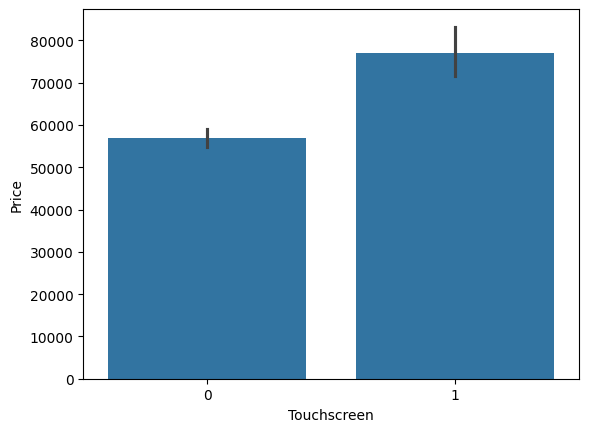

In [132]:
sns.barplot(x = df['Touchscreen'] , y = df['Price'])

- again from column 'ScreenResolution' we will made another column which tell whether the laptop has IPS panal or not

In [133]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [134]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
938,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,87325.920,0,0
721,HP,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,44574.048,1,1
750,Lenovo,Netbook,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,Windows 10,1.40,25308.000,1,0
1234,Apple,Ultrabook,11.6,1366x768,Intel Core i5 1.6GHz,4,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08,51095.520,0,0
694,Toshiba,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.50,51841.440,0,1


<Axes: xlabel='Ips'>

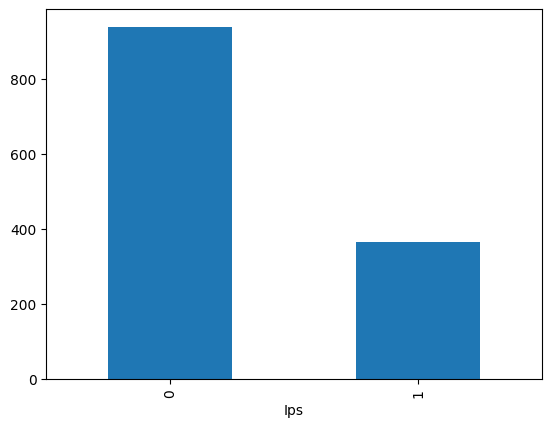

In [135]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

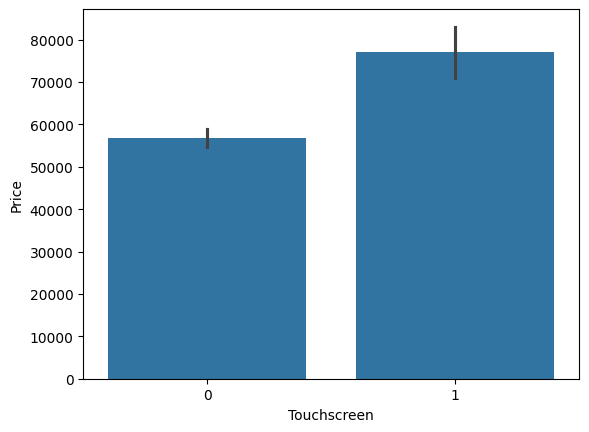

In [136]:
sns.barplot(x = df['Touchscreen'] , y = df['Price'])

- extract reolutions value form ScreenResolution

In [137]:
new = df['ScreenResolution'].str.split('x' , n = 1 , expand = True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [138]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [139]:
df['X_res'] = df['X_res'].str.replace(',' , '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [140]:

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [142]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [143]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [144]:
# Calculate correlations only for numeric columns
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)
#The numeric_only parameter is set to True to ensure only numeric columns are used for the calculation.

,Price
Price,1.000000
Ram,0.743007
X_res,0.556529
Y_res,0.552809
Ips,0.252208
Weight,0.210370
Touchscreen,0.191226
Inches,0.068197


- We made totally a new column called ppi : "pixel per inches" using column : ['Inches' , 'X_res' , 'Y_res']
- we use the formula  = ((X_res)**2 + (Y_res)**2)**0.5/Inches

In [145]:
df['ppi'] = (((df['X_res'])**2 + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [146]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [147]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
X_res,0.556529
Y_res,0.552809
ppi,0.473487
Ips,0.252208
Weight,0.210370
Touchscreen,0.191226
Inches,0.068197


In [148]:
df.drop(columns = ['ScreenResolution'] , inplace = True)

In [149]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [150]:
df.drop(columns = ['Inches' , 'X_res' , 'Y_res'] , inplace = True)

In [151]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


## Check CPU column

In [152]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [153]:
df['CpuName']=df['Cpu'].apply(lambda x: " " .join(x.split()[0:3]))

In [154]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [155]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == "Intel Core i5" or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [156]:
df['Cpu brand'] =  df['CpuName'].apply(fetch_processor)

In [157]:
df.sample(15)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CpuName,Cpu brand
1021,Toshiba,Ultrabook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.20,84715.2000,0,0,165.632118,Intel Core i5,Intel Core i5
1240,Lenovo,Notebook,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.20,31838.5296,0,0,141.211998,AMD A12-Series 9720P,AMD Processor
195,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,48697.9200,0,1,127.335675,Intel Core i5,Intel Core i5
1293,Lenovo,Notebook,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.7200,0,1,141.211998,Intel Core i7,Intel Core i7
207,Dell,Ultrabook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21,103842.7200,1,1,331.264236,Intel Core i7,Intel Core i7
127,Asus,Notebook,AMD E-Series 6110 1.5GHz,4,64GB SSD,AMD Radeon R2,Windows 10 S,1.65,14811.3072,0,0,111.935204,AMD E-Series 6110,AMD Processor
1192,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.86,25840.8000,0,0,100.454670,Intel Core i5,Intel Core i5
715,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 920MX,Windows 10,1.87,45664.6896,0,1,157.350512,Intel Core i5,Intel Core i5
493,Acer,Notebook,AMD A10-Series 9620P 2.5GHz,8,1TB HDD,AMD Radeon RX 540,Windows 10,2.20,30849.1200,0,0,100.454670,AMD A10-Series 9620P,AMD Processor
676,Asus,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,60472.8000,0,0,157.350512,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

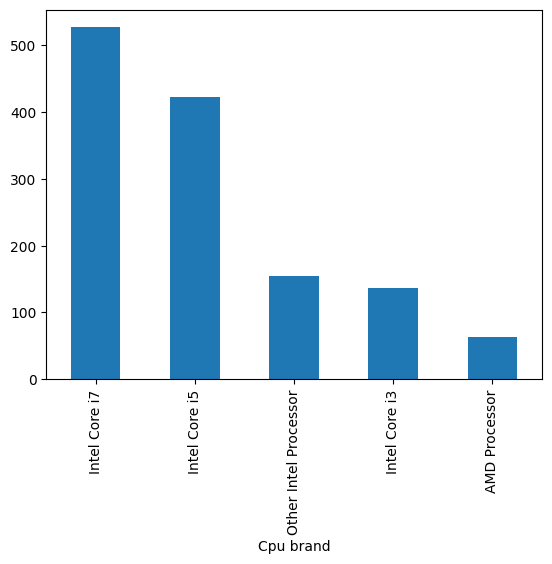

In [158]:
df['Cpu brand'].value_counts().plot(kind='bar')

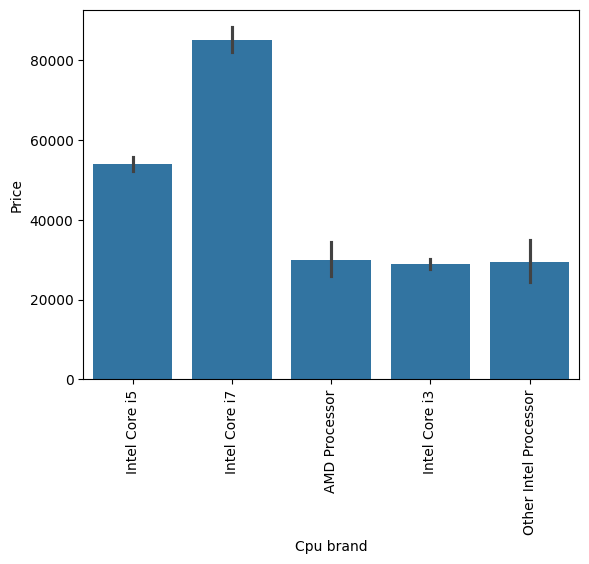

In [159]:
sns.barplot(x = df['Cpu brand'] , y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [160]:
df.drop(columns = ['CpuName' , 'Cpu'] , inplace = True)

In [161]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


### RAM column

<Axes: xlabel='Ram'>

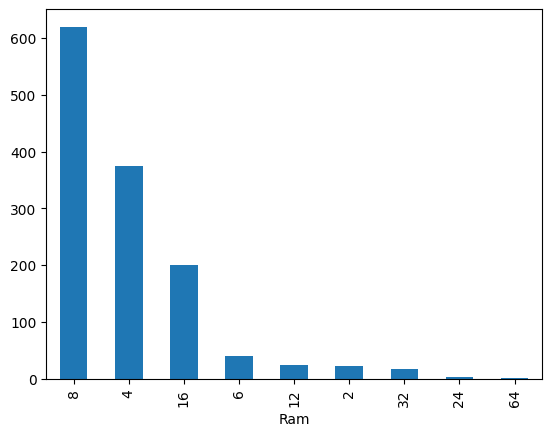

In [162]:
df['Ram'].value_counts().plot(kind='bar')

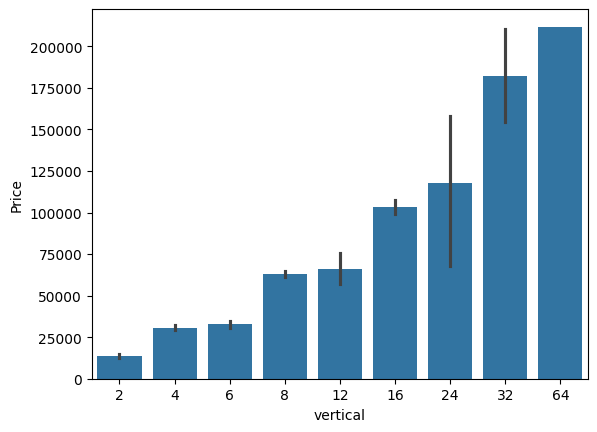

In [163]:
sns.barplot(x = df['Ram'] , y = df['Price'])
plt.xlabel('vertical')
plt.show()

### Memeory

In [164]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


- there are many types of memory given in data but we made 4 new columns 1: "HDD" , 2: "SSD" , 3: "Flash storage" ,4:"Hybrid"

In [166]:
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)  # Consistent use of regex=True
df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)

# Splitting memory into two layers, ensuring proper splitting.
new = df["Memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()  # Strip whitespaces
df["second"] = new[1].fillna("0").str.strip()  # Ensure 'second' column has no NaN values

# Applying storage type identification for 'first' and 'second'
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)  # Ensure only numeric values

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)  # Clean any non-numeric characters

# Converting columns to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculating actual storage capacities for HDD, SSD, Hybrid, and Flash Storage
df["HDD"] = (df["first"] * df["Layer1HDD"]) + (df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"]) + (df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"]) + (df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"]) + (df["second"] * df["Layer2Flash_Storage"])

# Dropping temporary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [167]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
254,Acer,Notebook,4,256 SSD,Nvidia GeForce MX130,Windows 10,3.00,37402.5600,0,1,127.335675,Intel Core i3,0,256,0,0
336,Dell,Ultrabook,8,128 SSD + 1000 HDD,Nvidia GeForce 940MX,Windows 10,1.90,55890.7200,0,1,141.211998,Intel Core i5,1000,128,0,0
858,Dell,Notebook,8,1000 HDD,Intel HD Graphics 520,Windows 10,1.62,34578.7200,1,0,165.632118,Intel Core i5,1000,0,0,0
771,Samsung,2 in 1 Convertible,16,256 SSD,AMD Radeon 540,Windows 10,1.71,95850.7200,1,0,146.860478,Intel Core i7,0,256,0,0
1294,HP,Notebook,6,1000 Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0,0,141.211998,AMD Processor,0,0,1000,0


In [168]:
df.drop(columns= ['Memory'] , inplace = True)

In [169]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [170]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
SSD,0.670799
ppi,0.473487
Ips,0.252208
Weight,0.210370
Touchscreen,0.191226
Hybrid,0.007989
Flash_Storage,-0.040511
HDD,-0.096441


In [171]:
df.drop(columns = ['Hybrid' , 'Flash_Storage'] , inplace = True)

In [172]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


### GPU columns

In [173]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [174]:
df['Gpu brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [175]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [176]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [177]:
df=df[df['Gpu brand'] !='ARM']

In [178]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180


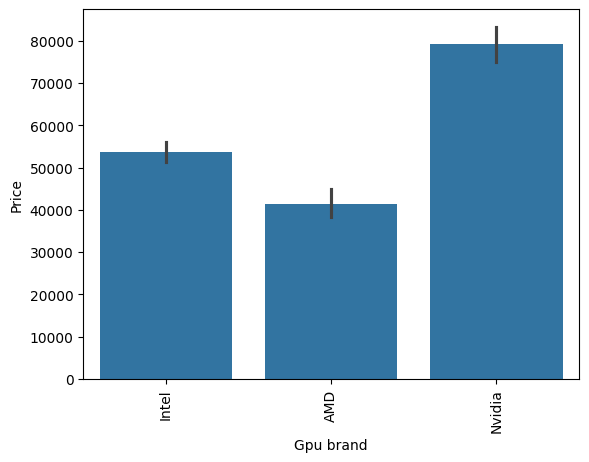

In [179]:
sns.barplot(x = df['Gpu brand'] , y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [180]:
df.drop(columns = ['Gpu'] , inplace = True)

In [181]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


### OpSys

In [182]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [183]:
def cat_os(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  else:
    return 'Other/Linu/Chrome OS/Android'

In [184]:
df['os'] = df['OpSys'].apply(cat_os)

In [185]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linu/Chrome OS/Android
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [186]:
df.drop( columns = ['OpSys'] , inplace = True)

In [187]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linu/Chrome OS/Android
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


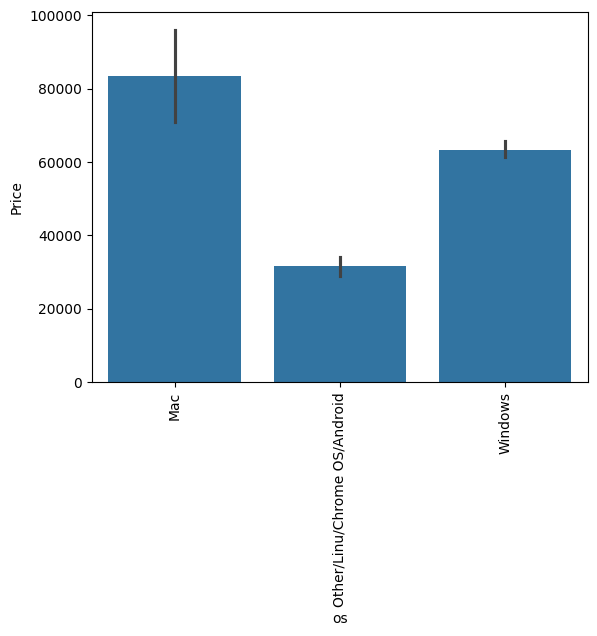

In [188]:
sns.barplot(x = df['os'] , y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Weigth

<ipython-input-189-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

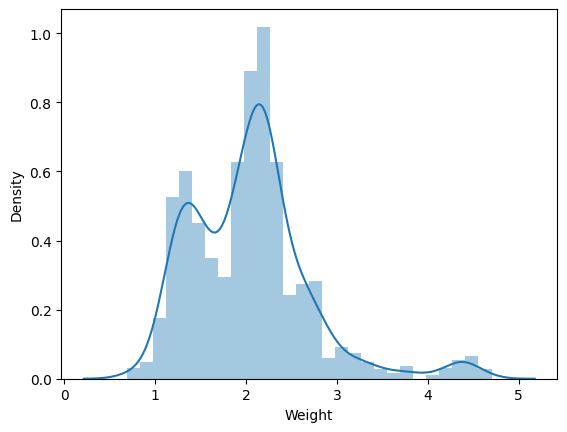

In [189]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

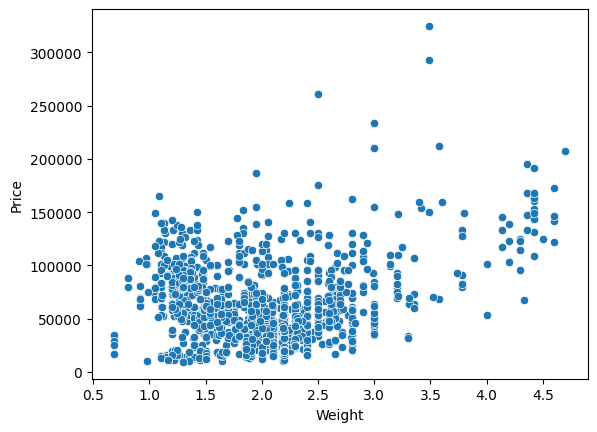

In [190]:
sns.scatterplot(x = df['Weight'] , y = df['Price'])

In [191]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.742905
SSD,0.670660
ppi,0.475368
Ips,0.253320
Weight,0.209867
Touchscreen,0.192917
HDD,-0.096891


<Axes: >

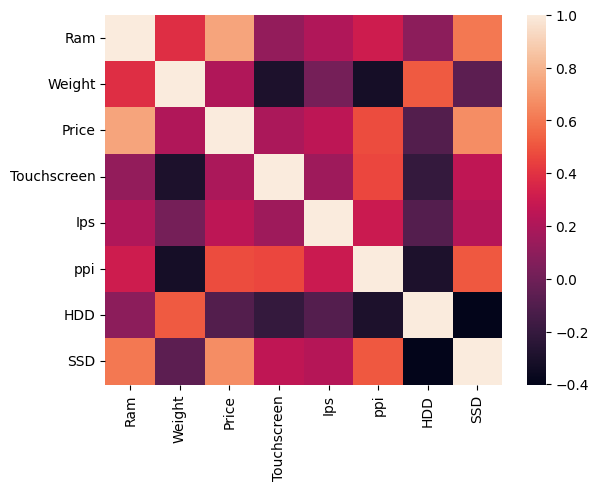

In [192]:
sns.heatmap(df.corr(numeric_only=True))

### Target column
- our target column is left skewed and if we apply log transformation then we get normal distribution

<ipython-input-193-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

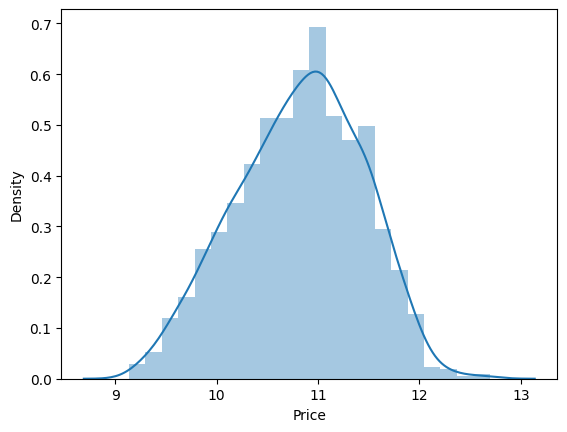

In [193]:
sns.distplot(np.log(df['Price']))

### Train Test split and model building

In [194]:
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])


In [195]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linu/Chrome OS/Android
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [196]:
y.head()

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101


In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.15 , random_state = 2)

In [199]:
X_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Other/Linu/Chrome OS/Android
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows


### One-Hot-Encoding
- now we apply one hot encodeing on columns like = ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os']

In [200]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score , mean_absolute_error

In [201]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , AdaBoostRegressor , ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear Regression

In [202]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.807327744841864
MAE 0.21017827976428802


### Ridge Regression

In [203]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = Ridge(alpha = 10)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582968


### Lasso Regression

In [204]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = Lasso(alpha =0.001)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


### K-Nearest Neighbour

In [205]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = KNeighborsRegressor(n_neighbors = 3)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.8017673664034364
MAE 0.19346118183798544


### Decesion Tree

In [206]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth = 8)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.8448311465310512
MAE 0.18079358348617125


### SVM

In [207]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = SVR(kernel = 'rbf' , C=10000 , epsilon = 0.1)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.8083180902272435
MAE 0.20239059427315706


### Random Forest

In [208]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators = 100 ,
                              random_state = 3 ,
                              max_samples = 0.5 ,
                              max_features = 0.75 ,
                              max_depth = 15)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


### Extra tress

In [209]:


step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = ExtraTreesRegressor(n_estimators = 100,
                              random_state = 3,
                              max_samples = None,
                              max_features = 0.75,
                              max_depth = 15)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.8753793123440623
MAE 0.15979519126758127


### AdaBoost

In [210]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = AdaBoostRegressor(n_estimators = 15 , learning_rate = 1.0)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.7956388042004441
MAE 0.2272077684846643


### Gradient Boost

In [211]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators = 500)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

R2 score 0.883053040074437
MAE 0.15906046131228366


### XgBoost

In [212]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse_output = False , drop = 'first') , ['Company' , 'TypeName' , 'Cpu brand' , 'Gpu brand' , 'os'])
] , remainder = 'passthrough')

step2 = XGBRegressor(n_estimator=45 , max_depth  = 5 , learning_rate = 0.5)

pipe = Pipeline([
    ('step1' , step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 score' , r2_score(y_test , y_pred))
print('MAE' , mean_absolute_error(y_test , y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:17:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


R2 score 0.872252101548538
MAE 0.16132975092928226


### Voting Regressor

In [213]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10) # Set max_samples to None

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8896855834639584
MAE 0.15828835946097247


### Stacking

In [214]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8787428569688939
MAE 0.16666937661044254


### Exporting the model

In [215]:
import pickle
pickle.dump(df , open('df.pkl' , 'wb'))
pickle.dump(pipe , open('pipe.pkl' , 'wb'))